In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Other libraries using Matplotlib

- Matplotlib provides building blocks and configuration capabilities to adapt a plot completely to your needs.
- That's usually a couple of lines of code.
- Providing ready made domain-specific plots is beyond the scope.

There are many libraries building on top of Matplotlib https://matplotlib.org/thirdpartypackages/index.html

## Write your own wrapper function

Example: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

In [2]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa39bda37d0>)

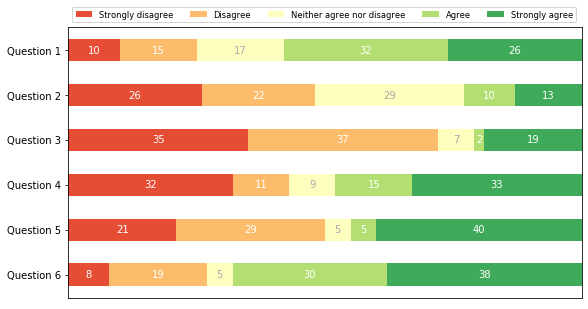

In [3]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

survey(results, category_names)

# `pandas` and matplotlib

`pandas.plot` provides a high-level plotting interface to draw content of DataFrames using Matplotllib.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
df = pd.DataFrame({'A': [1, 2, 4, 8], 'B': [4, 6, 3, 5]})

Pure Matplotlib:

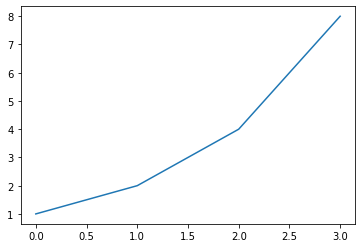

In [11]:
plt.plot(df.index, df.A)

Using `DataFrame.plot`.

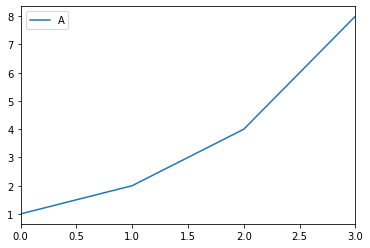

In [18]:
df.plot.line(y='A')

*Note*: `DataFrame.plot` has originally been a single function. The kind of plot (line, bar, ...) could be chosen by the `kind` parameter. This is a bit too generic.

Nowadays, `DataFrame.plot` can also be regarded as a namespace with sub-functions `DataFrame.plot.line()`, `DataFrame.plot.bar()`, ...

### Which Axes do my data go to?

Handling of Axes:

- `matplotlib.pyplot`: Plot into current axes (create one if necessary)
- `matplotlib` OOP: Explicitly create axes
- `pandas.plot`: Creates a new axes and plots into that. Alternatively, pass an existing axes via the `ax` keyword argument.

Return value:
- `matplotlib` plotting functions return the created Artist.
- `pandas.plot` plotting functions return the axes

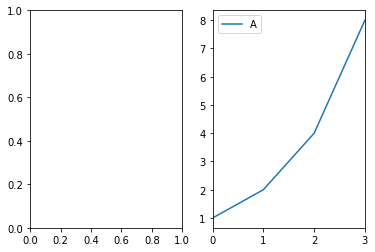

In [30]:
fig, axs = plt.subplots(1, 2)
df.plot.line(y='A')
#df.plot.line(y='A', ax=axs[1])

### Philosophies

- Matplotlib: Every aspect of the plot is configured by a separate function.
- `pandas.plot`: Convenience function to quickly draw data with some common settings.

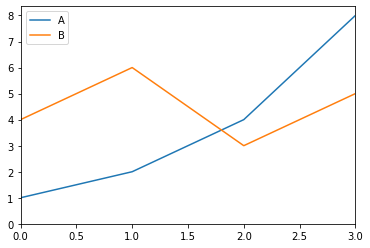

In [35]:
df.plot.line(ylim=(0, None), title='My data')

Text(0.5, 1.0, 'My data')

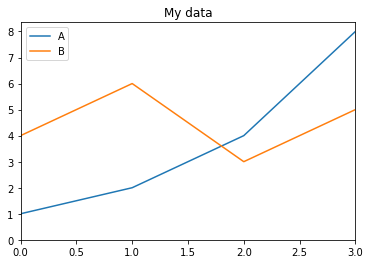

In [56]:
plt.plot(df.index, df.A, label='A')
plt.plot(df.index, df.B, label='B')
plt.ylim(0, None)
plt.xlim(0, max(df.index))
plt.legend()
plt.title('My data')

You combine both worlds:
- Use conveninece functions to draw the main part of the figure.
- Fine-tune further using Matplotlib functions.

Text(1.3, 7.2, 'Look here')

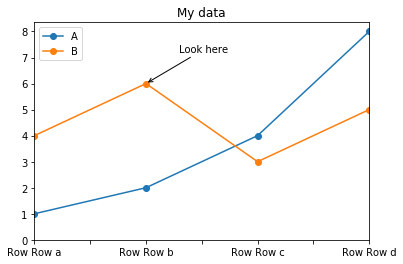

In [70]:
ax = df.plot.line(ylim=(0, None), marker='o', title='My data')
ax.annotate('Look here', (1, 6), xytext=(1.3, 7.2), arrowprops={'arrowstyle': '->'})

In [68]:
df.index = [f'Row {i}' for i in df.index]

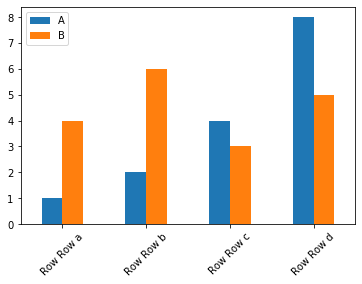

In [75]:
df.plot.bar(rot=45)